In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("https://s3.amazonaws.com/filtereddatasets/Wine_Dine/winequality-red.csv")
data1 = pd.read_csv("https://s3.amazonaws.com/filtereddatasets/Wine_Dine/winequality-white.csv")

In [2]:
data.shape # (Q) how many data-points and features?

(1599, 12)

In [3]:
data1.shape


(4898, 12)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Questions to be answered :

what is the best definition of wine quality.
Red wine: relationship between ph and quality of wine ?
White wine: residual sugar related to ph
build a model to predict quality of red wine..
cross validation of the model
use the same model for white wine...
As the situation demands , i will first build a model for red wine

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#checking any null values ...
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [9]:
#(Q) How many data points for each class of quality are present? 

data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
#descriptive statistics of the data 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


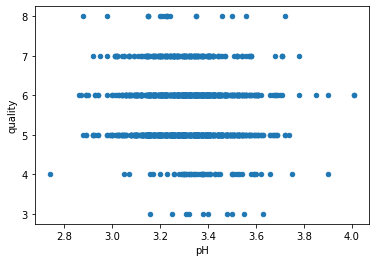

In [11]:
#2-D scatter plot:
# to understand the relationship between ph value and quality in red wine...

data.plot(kind='scatter', x='pH', y='quality') ;
plt.show()

#cannot make much sense out it 
#What if we color the points by their class-label

#with same ph there are some cases where the quality is also the same...

<AxesSubplot:xlabel='pH', ylabel='quality'>

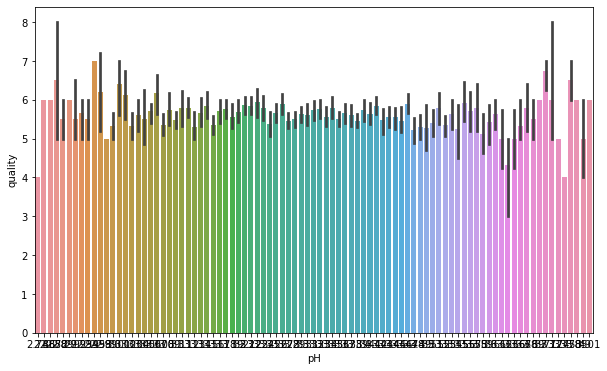

In [12]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'pH', y = 'quality', data = data)

with this result we cannot claim that quality of wine always decreases with decrease in ph ...

we can try and understand which feature results in increasing quality of red wine ... for this we can create a subdivision among our quality dataset as "good"=2 and "bad"=1 and assign it to a new feature call "

In [13]:
new=[]
for row in data['quality']:
    if (row<=5):
        val=1
    else:
        val=2
    new.append(val)

In [15]:
data['newquality']=new
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
from collections import Counter
print(sorted(Counter(data['newquality']).items()))

[(1, 744), (2, 855)]


unbalanced data showing low quality in smaller number than higher quality.. we will oversample the low quality data

C:\Users\91730\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

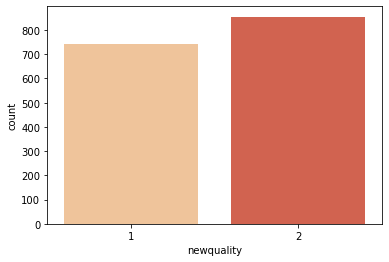

In [18]:
# quantity ot good vs bad quality wines 
sns.countplot(data['newquality'],palette='OrRd')
#here 1=

<AxesSubplot:>

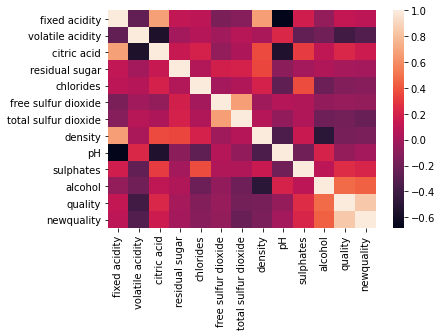

In [19]:
#drawing the heatmap to understand individual relationships...
#correaltion map
sns.heatmap(data.corr())

In [20]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,newquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


Ques 1 : Your friend argues that in red wine, pH has no impact on the quality of the wine. You say that is not true, who is right? Justify your answer. Ans : Here we can again see that the quality of wine is negatively dependent on the pH with a correlation coefficient of -0.057731. So in this case my friend was wrong and I am right.Morever positively related features : fixed acidity,citric acid,residual sugar,sulphates,alcohol.Among which the strongest feature is "alcohol" as it has the highest value.(excluding new quality)

We can also see that almost all points that we see are important for the analysis

Now taking white wine into considering Ques 2 :You both agree that "residual sugar" of white wine will be related to the "pH" of the wine. How true is this? Justify your answer.

In [21]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<AxesSubplot:>

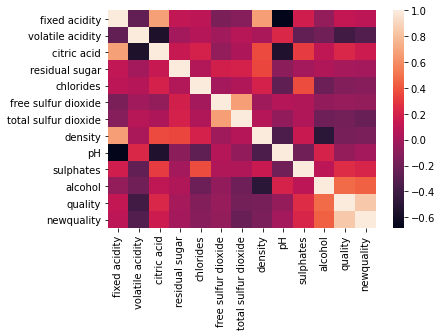

In [22]:
sns.heatmap(data.corr())

In [23]:
data1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Ans : We can clearly see that "residual sugar" is negatively related to "pH" of white wine(-0.194133). But much more relatable are density(0.838966) and alcohol(-0.450631).

building the model

In [24]:
X=data.drop(['quality','newquality'],axis=1)
Y=data['newquality']

In [25]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
Y.head()

0    1
1    1
2    1
3    2
4    1
Name: newquality, dtype: int64

we can dividw the red wine dataset into train and test sets

In [27]:
from sklearn.model_selection import train_test_split
x_train1,x_test,y_train1,y_test=train_test_split(X,Y,test_size=0.20,random_state=1234)

using smote technique to oversample the data

In [28]:
!pip install imblearn

In [29]:
!pip install delayed

In [30]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)

C:\Users\91730\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

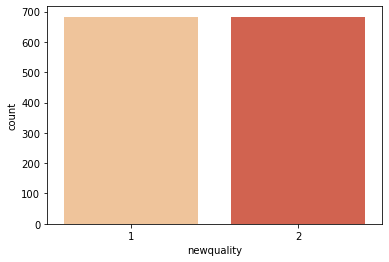

In [31]:
sns.countplot(y_train,palette='OrRd')

both classes are equal now

In [32]:
print(sorted(Counter(y_train).items()))

[(1, 683), (2, 683)]


In [33]:
!pip install xgboost

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

train accuracy: 0.739385065885798 
 test accuracy: 0.7625


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.80      0.72      0.76       166
           2       0.73      0.81      0.77       154

    accuracy                           0.76       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.77      0.76      0.76       320



confusion matrix for logistic regression


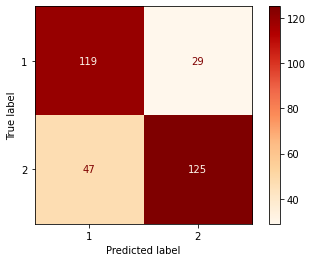

In [35]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7408491947291361 
 test accuracy: 0.76875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.81      0.72      0.76       166
           2       0.73      0.82      0.77       154

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



confusion matrix for linear discriminant analysis


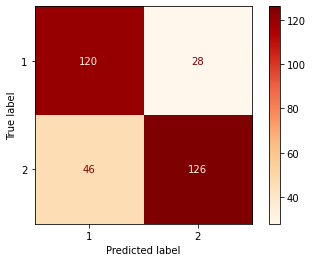

In [36]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(lda, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.715625


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.70      0.69      0.69       149
           2       0.73      0.74      0.73       171

    accuracy                           0.72       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320



confusion matrix for decision tree classifier


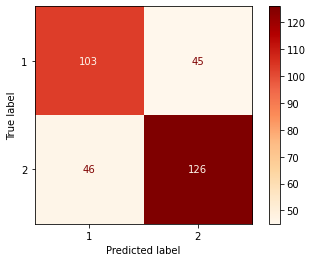

In [37]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.853125


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.87      0.82      0.85       157
           2       0.84      0.88      0.86       163

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for random forest classifier


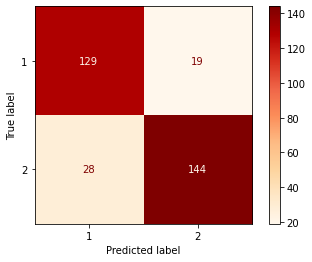

In [38]:
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.8726207906295754 
 test accuracy: 0.803125


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       153
           2       0.80      0.83      0.81       167

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for gradient boosting classifier


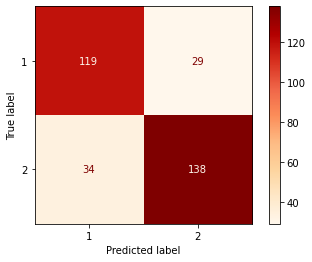

In [39]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model6=gbm.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7825768667642753 
 test accuracy: 0.778125


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.80      0.74      0.77       159
           2       0.76      0.81      0.79       161

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for adaboost classifier


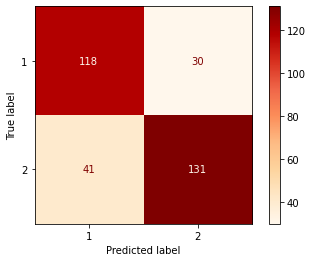

In [40]:
# adaboost classifier 
ada=AdaBoostClassifier()
model7=ada.fit(x_train, y_train)
print("train accuracy:",model7.score(x_train, y_train),"\n","test accuracy:",model7.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

C:\Users\91730\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 1.0 
 test accuracy: 0.8125


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           1       0.78      0.81      0.79       144
           2       0.84      0.82      0.83       176

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



confusion matrix for extreme gradient boosting classifier


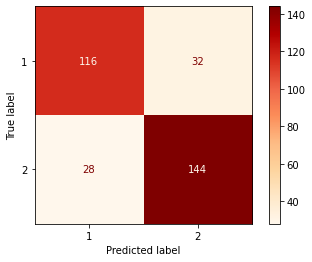

In [41]:
# extreme gradient boost classifier
xgb = XGBClassifier()
model8=xgb.fit(x_train.values, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgb, x_test.values, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.853125


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.86      0.83      0.84       155
           2       0.84      0.88      0.86       165

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for voting classifier


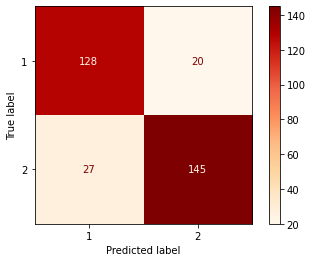

In [42]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model10=vc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vc, x_test, y_test ,cmap=plt.cm.OrRd, values_format='d')

train accuracy: 0.9890190336749634 
 test accuracy: 0.790625


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.79      0.76      0.78       153
           2       0.79      0.81      0.80       167

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



confusion matrix for bagging classifier


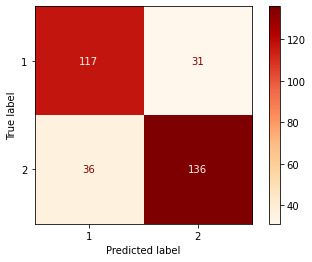

In [43]:
#bagging classifier
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.85


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       150
           2       0.85      0.86      0.86       170

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for extra tree classifier


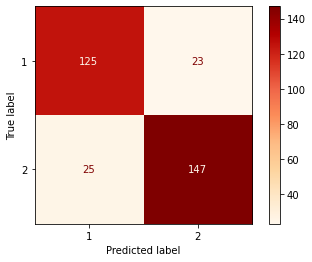

In [44]:
# extra tree classifier
extree = ExtraTreesClassifier()
model9=extree.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extree, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

it seems that voting classifier model gives the best accuracy 86.25% using SMOTE over samppling

Now implementing the model without over sampling

train accuracy: 0.7427677873338546 
 test accuracy: 0.78125


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       156
           2       0.77      0.81      0.79       164

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for logistic regression


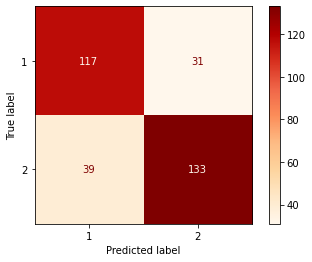

In [45]:
#logistic regression without resampling
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lrw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7396403440187647 
 test accuracy: 0.7875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       156
           2       0.78      0.82      0.80       164

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



confusion matrix for linear discriminant analysis


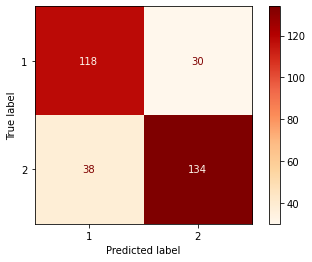

In [46]:
#linear discriminant analysis
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

ldawpred = ldaw.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldawpred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(ldaw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.74375


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.70      0.74      0.72       140
           2       0.78      0.75      0.77       180

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



confusion matrix for decision tree classifier


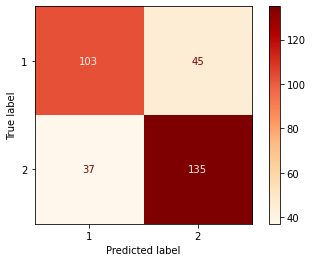

In [47]:
#decision tree classifier
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtwpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dtw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.8375


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.82      0.83      0.82       146
           2       0.85      0.84      0.85       174

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for random forest classifier


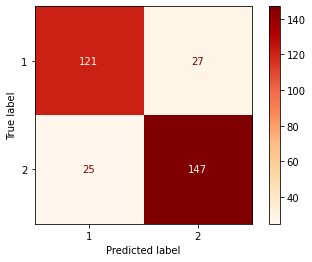

In [48]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rfw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9882720875684128 
 test accuracy: 0.8


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       152
           2       0.80      0.82      0.81       168

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for bagging classifier


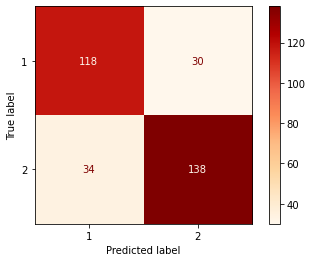

In [49]:
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgwpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bgw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.874120406567631 
 test accuracy: 0.8


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.80      0.77      0.79       154
           2       0.80      0.83      0.81       166

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for gradient boosting classifier


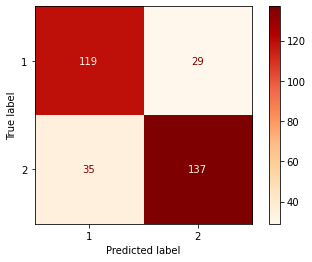

In [50]:
gbmw=GradientBoostingClassifier()
model17=gbmw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

gbmwpred = gbmw.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmwpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbmw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7998436278342455 
 test accuracy: 0.7625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.74      0.75      0.74       146
           2       0.78      0.78      0.78       174

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



confusion matrix for adaboost classifier


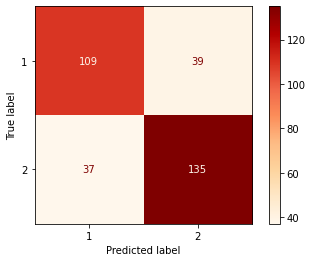

In [51]:
adaw=AdaBoostClassifier()
model18=adaw.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adawpred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(adaw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

C:\Users\91730\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:33:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 1.0 
 test accuracy: 0.825


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           1       0.82      0.81      0.81       150
           2       0.83      0.84      0.84       170

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



confusion matrix for extreme gradient boosting classifier


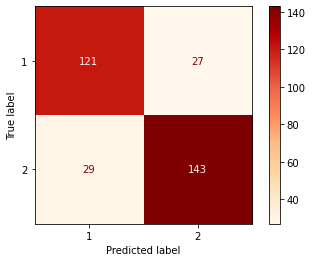

In [52]:
xgbw = XGBClassifier()
model19=xgbw.fit(x_train1.values, y_train1)
print("train accuracy:",model19.score(x_train1, y_train1),"\n","test accuracy:",model19.score(x_test,y_test))

xgbwpred = xgbw.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbwpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgbw, x_test.values, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.83125


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.80      0.83      0.81       142
           2       0.86      0.83      0.85       178

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



confusion matrix for extra tree classifier


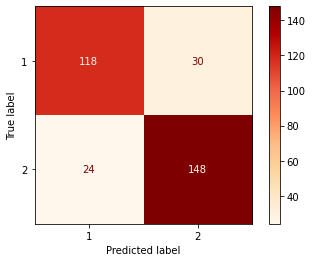

In [53]:
extreew = ExtraTreesClassifier()
model20=extreew.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extwpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extreew, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.85625


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.85      0.84       144
           2       0.88      0.86      0.87       176

    accuracy                           0.86       320
   macro avg       0.85      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


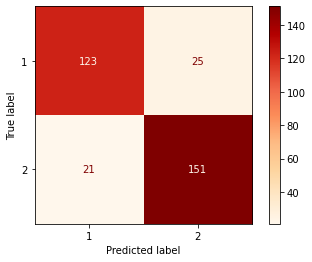

In [54]:

clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vcw = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model21=vcw.fit(x_train1, y_train1)
print("train accuracy:",model21.score(x_train1, y_train1),"\n","test accuracy:",model21.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vcw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [56]:
!pip install --upgrade scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\91730\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



train accuracy: 1.0 
 test accuracy: 0.859375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.86      0.85       143
           2       0.88      0.86      0.87       177

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


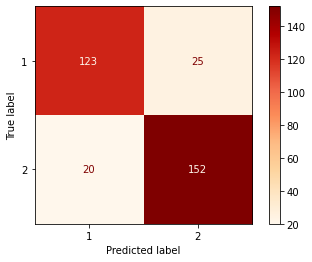

In [57]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=2)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=12)))]
scw= StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

model22=scw.fit(x_train1, y_train1)
print("train accuracy:",model22.score(x_train1, y_train1),"\n","test accuracy:",model22.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(scw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

without sampling case give extra tree classifier as the best accuracy , but we see that oversampling using smote gave us the best accuracy with voting classifier model accuracy 86.25%

Applying the same for white wine dataset

In [58]:
data1['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [59]:
new=[]
for row in data1['quality']:
    if (row<=5):
        val=1
    else:
        val=2
    new.append(val)

In [60]:
data1['newquality']=new

C:\Users\91730\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

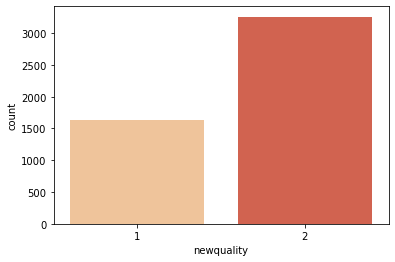

In [61]:
sns.countplot(data1['newquality'],palette='OrRd')

In [62]:
#highly imbalance data, applying oversampling technique

In [63]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train1, y_train1)

C:\Users\91730\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newquality', ylabel='count'>

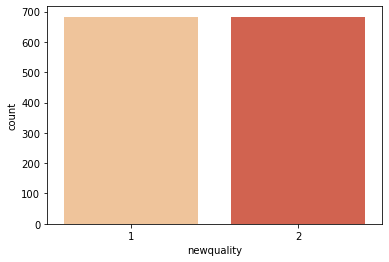

In [64]:
sns.countplot(y_train,palette='OrRd')

In [65]:
print(sorted(Counter(y_train).items()))

[(1, 683), (2, 683)]


train accuracy: 0.739385065885798 
 test accuracy: 0.759375


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.80      0.71      0.76       167
           2       0.72      0.81      0.76       153

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



confusion matrix for logistic regression


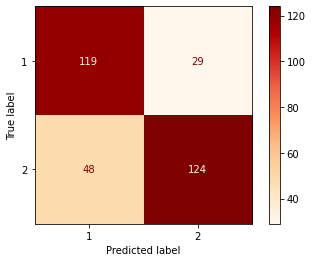

In [66]:
#logistic regression
lr = LogisticRegression(max_iter=20000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, x_test, y_test,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7386530014641288 
 test accuracy: 0.7625


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.81      0.71      0.76       168
           2       0.72      0.82      0.77       152

    accuracy                           0.76       320
   macro avg       0.77      0.77      0.76       320
weighted avg       0.77      0.76      0.76       320



confusion matrix for linear discriminant analysis


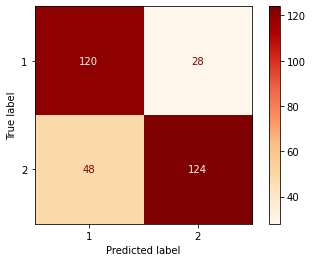

In [67]:
#linear discriminant analysis
lda = LinearDiscriminantAnalysis()
model2=lda.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))

ldapred = lda.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldapred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(lda, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.753125


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.76      0.72      0.74       155
           2       0.75      0.78      0.77       165

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



confusion matrix for decision tree classifier


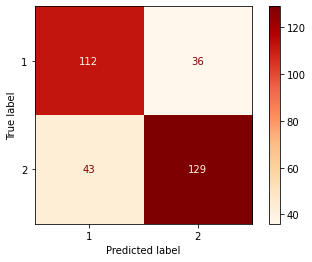

In [68]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dt, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.840625


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.84      0.82      0.83       151
           2       0.84      0.86      0.85       169

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for random forest classifier


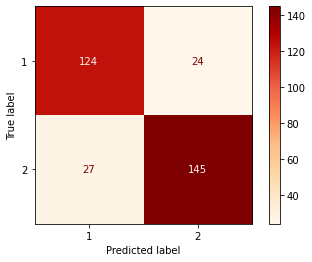

In [69]:
#random forest classifier
rf=RandomForestClassifier()
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9919472913616398 
 test accuracy: 0.8125


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.84      0.77      0.81       162
           2       0.78      0.85      0.82       158

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.82      0.81      0.81       320



confusion matrix for bagging classifier


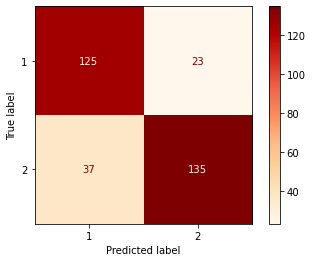

In [70]:
#bagging classifier
bg=BaggingClassifier()
model5=bg.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

bgpred = bg.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bg, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.8748169838945827 
 test accuracy: 0.815625


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.83      0.78      0.81       157
           2       0.80      0.85      0.82       163

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



confusion matrix for gradient boosting classifier


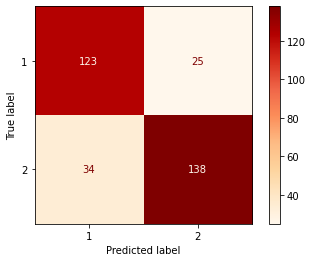

In [71]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model6=gbm.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7950219619326501 
 test accuracy: 0.765625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.77      0.74      0.75       155
           2       0.76      0.79      0.78       165

    accuracy                           0.77       320
   macro avg       0.77      0.76      0.76       320
weighted avg       0.77      0.77      0.77       320



confusion matrix for adaboost classifier


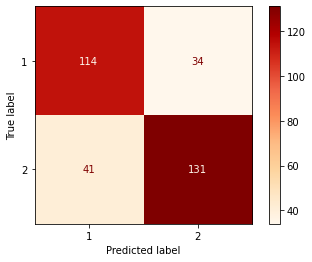

In [72]:
# adaboost classifier 
ada=AdaBoostClassifier()
model7=ada.fit(x_train, y_train)
print("train accuracy:",model7.score(x_train, y_train),"\n","test accuracy:",model7.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adapred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(ada, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

C:\Users\91730\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 1.0 
 test accuracy: 0.834375


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           1       0.82      0.82      0.82       149
           2       0.84      0.85      0.85       171

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



confusion matrix for extreme gradient boosting classifier


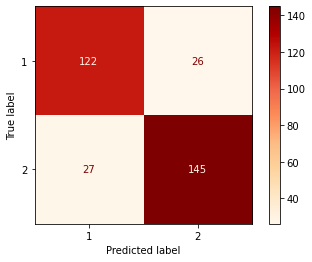

In [73]:
# extreme gradient boost classifier
xgb = XGBClassifier()
model8=xgb.fit(x_train.values, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgb, x_test.values, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.85


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       150
           2       0.85      0.86      0.86       170

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



confusion matrix for extra tree classifier


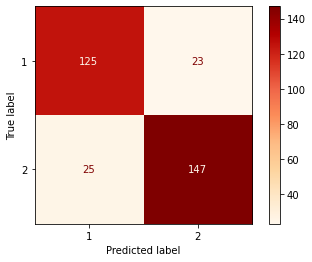

In [74]:
# extra tree classifier
extree = ExtraTreesClassifier()
model9=extree.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extree, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.859375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.85      0.85      0.85       149
           2       0.87      0.87      0.87       171

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


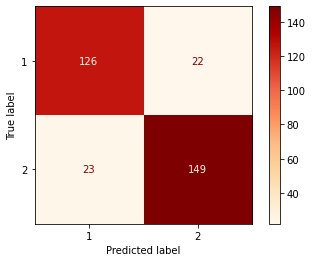

In [75]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model10=vc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vc, x_test, y_test ,cmap=plt.cm.OrRd, values_format='d')

train accuracy: 1.0 
 test accuracy: 0.840625


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.84      0.82      0.83       153
           2       0.84      0.86      0.85       167

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for voting classifier


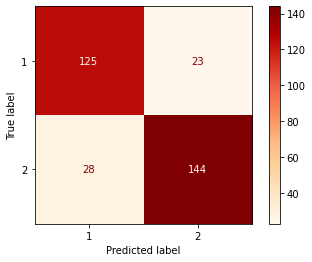

In [76]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=42)))]
sc= StackingClassifier( estimators=estimators)

model11=sc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),"\n","test accuracy:",model11.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(sc, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7427677873338546 
 test accuracy: 0.78125


classification report for logistic regression
              precision    recall  f1-score   support

           1       0.79      0.75      0.77       156
           2       0.77      0.81      0.79       164

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320



confusion matrix for logistic regression


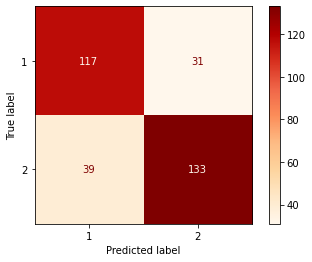

In [77]:
#logistic regression without resampling
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))
lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(lrwpred,y_test))
print("\n")
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lrw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7396403440187647 
 test accuracy: 0.7875


classification report for linear discriminant analysis
              precision    recall  f1-score   support

           1       0.80      0.76      0.78       156
           2       0.78      0.82      0.80       164

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



confusion matrix for linear discriminant analysis


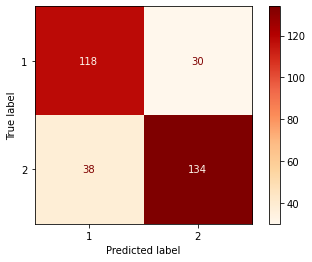

In [78]:
#linear discriminant analysis
ldaw = LinearDiscriminantAnalysis()
model13=ldaw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

ldawpred = ldaw.predict(x_test)
print("\n")
print("classification report for linear discriminant analysis")
print(classification_report(ldawpred,y_test))
print("\n")
print("confusion matrix for linear discriminant analysis")
displr = plot_confusion_matrix(ldaw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.746875


classification report for decision tree classifier
              precision    recall  f1-score   support

           1       0.74      0.72      0.73       151
           2       0.76      0.77      0.76       169

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



confusion matrix for decision tree classifier


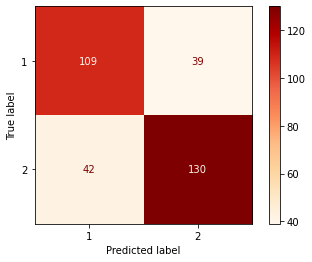

In [79]:
#decision tree classifier
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(dtwpred,y_test))
print("\n")
print("confusion matrix for decision tree classifier")
displr = plot_confusion_matrix(dtw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.84375


classification report for random forest classifier
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       146
           2       0.86      0.85      0.86       174

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for random forest classifier


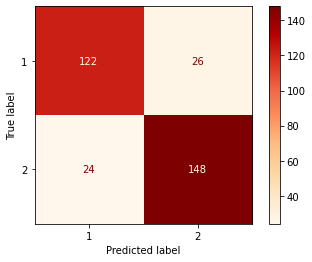

In [80]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(rfwpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rfw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.9851446442533229 
 test accuracy: 0.784375


classification report for bagging classifier
              precision    recall  f1-score   support

           1       0.80      0.75      0.78       159
           2       0.77      0.82      0.79       161

    accuracy                           0.78       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.79      0.78      0.78       320



confusion matrix for bagging classifier


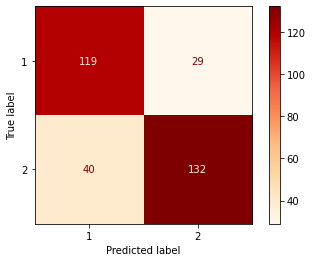

In [81]:
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(bgwpred,y_test))
print("\n")
print("confusion matrix for bagging classifier")
displr = plot_confusion_matrix(bgw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.874120406567631 
 test accuracy: 0.803125


classification report for gradient boosting classifier
              precision    recall  f1-score   support

           1       0.80      0.78      0.79       153
           2       0.80      0.83      0.81       167

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



confusion matrix for gradient boosting classifier


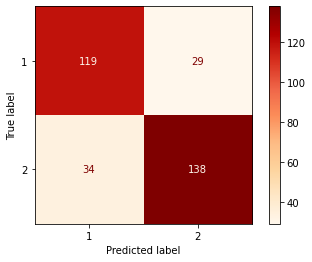

In [82]:
gbmw=GradientBoostingClassifier()
model17=gbmw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

gbmwpred = gbmw.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmwpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbmw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 0.7998436278342455 
 test accuracy: 0.7625


classification report for adaboost classifier
              precision    recall  f1-score   support

           1       0.74      0.75      0.74       146
           2       0.78      0.78      0.78       174

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



confusion matrix for adaboost classifier


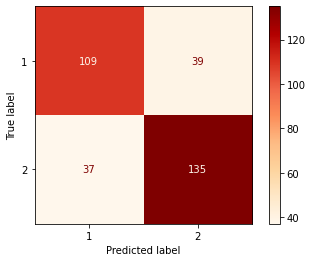

In [83]:
adaw=AdaBoostClassifier()
model18=adaw.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(adawpred,y_test))
print("\n")
print("confusion matrix for adaboost classifier")
displr = plot_confusion_matrix(adaw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

C:\Users\91730\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:39:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 1.0 
 test accuracy: 0.825


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

           1       0.82      0.81      0.81       150
           2       0.83      0.84      0.84       170

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320



confusion matrix for extreme gradient boosting classifier


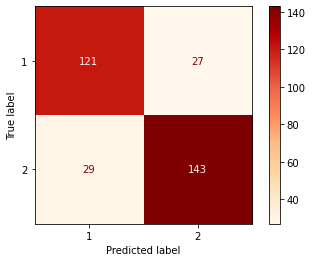

In [84]:
xgbw = XGBClassifier()
model19=xgbw.fit(x_train1.values, y_train1)
print("train accuracy:",model19.score(x_train1, y_train1),"\n","test accuracy:",model19.score(x_test,y_test))

xgbwpred = xgbw.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(xgbwpred,y_test))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
displr = plot_confusion_matrix(xgbw, x_test.values, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.84375


classification report for extra tree classifier
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       144
           2       0.87      0.85      0.86       176

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.84      0.84      0.84       320



confusion matrix for extra tree classifier


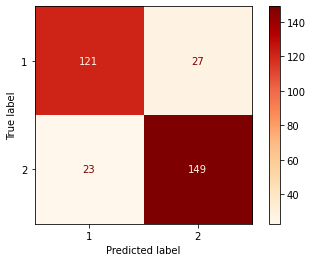

In [85]:
extreew = ExtraTreesClassifier()
model20=extreew.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(extwpred,y_test))
print("\n")
print("confusion matrix for extra tree classifier")
displr = plot_confusion_matrix(extreew, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.85625


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.84      0.84      0.84       148
           2       0.87      0.87      0.87       172

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


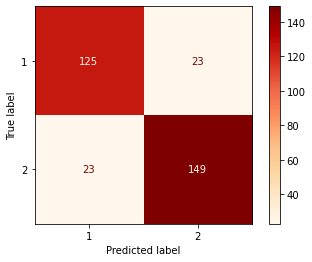

In [86]:
clf1 = ExtraTreesClassifier()
clf2 = RandomForestClassifier()

vcw = VotingClassifier(estimators=[('ext', clf1),('rf', clf2)], voting='soft')
model21=vcw.fit(x_train1, y_train1)
print("train accuracy:",model21.score(x_train1, y_train1),"\n","test accuracy:",model21.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(vcwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(vcw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

train accuracy: 1.0 
 test accuracy: 0.859375


classification report for voting classifier
              precision    recall  f1-score   support

           1       0.83      0.86      0.85       143
           2       0.88      0.86      0.87       177

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



confusion matrix for voting classifier


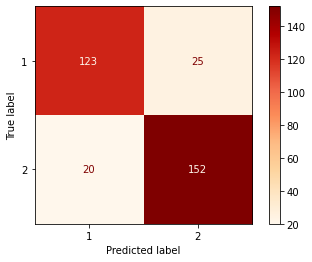

In [87]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=2)),('ext', make_pipeline(StandardScaler(),  ExtraTreesClassifier(random_state=12)))]
scw= StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

model22=scw.fit(x_train1, y_train1)
print("train accuracy:",model22.score(x_train1, y_train1),"\n","test accuracy:",model22.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(scwpred,y_test))
print("\n")
print("confusion matrix for voting classifier")
displr = plot_confusion_matrix(scw, x_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

stacking classifier is the best model here with accuracy 85.9375%... overall both random forest in oversampling and stacking classifier in without oversampling are the best cases.